In [1]:
import os
import math
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import Series

from sklearn.model_selection import train_test_split
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from statsmodels.stats.stattools import durbin_watson

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.vector_ar.vecm import coint_johansen

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [3]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [4]:
# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [5]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [6]:
# ADF test untuk mobility london
for name, column in case.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6334
 No. Lags Chosen       = 17
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.4657. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [7]:
# Differencing order = 1
mobility_diff = mobility.diff(periods=1)
mobility_diff = mobility_diff.iloc[1:]

case_diff = case.diff(periods=1)
case_diff = case_diff.iloc[1:]

new_weather = new_weather.iloc[1:]
mobility_diff.head()

,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,
2020-03-19,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,9.0,3.0,16.0,-4.0,-22.0,4.0


In [8]:
case_diff.head()

,case
date,
2020-03-19,12.0
2020-03-20,-36.0
2020-03-21,30.0
2020-03-22,-8.0
2020-03-23,15.0


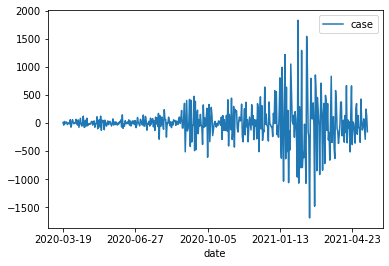

In [9]:
case_diff.plot()
plt.show()

In [10]:
#scaler = MinMaxScaler()

#case_diff[['case']] = scaler.fit_transform(case_diff[['case']])

#mobility_diff[['retail_recreation', 'grocery_pahrmacy', 'parks', 'transit_station', 'workplace', 'residential']] = scaler.fit_transform(mobility_diff[['retail_recreation', 'grocery_pahrmacy', 'parks', 'transit_station', 'workplace', 'residential']])

#new_weather[['rh', 'avt', 'mxt', 'mnt']] = scaler.fit_transform(new_weather[['rh', 'avt', 'mxt', 'mnt']])

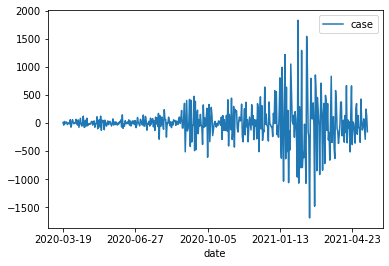

In [11]:
case_diff.plot()
plt.show()

In [12]:
# ADF test untuk mobility london
for name, column in case_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7239
 No. Lags Chosen       = 16
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.




In [13]:
data = pd.concat([case_diff, new_weather, mobility_diff], axis=1)
data.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-19,12.0,83.0,28.1,31.4,25.800000,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-36.0,82.0,27.4,31.2,25.200000,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,30.0,81.0,28.1,32.4,26.521978,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-8.0,84.0,27.2,31.2,25.000000,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,15.0,81.0,28.2,31.8,25.000000,9.0,3.0,16.0,-4.0,-22.0,4.0


In [14]:
data.shape

(422, 11)

In [15]:
train = data[:412]
train

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-19,12.0,83.0,28.1,31.4,25.800000,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-36.0,82.0,27.4,31.2,25.200000,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,30.0,81.0,28.1,32.4,26.521978,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-8.0,84.0,27.2,31.2,25.000000,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,15.0,81.0,28.2,31.8,25.000000,9.0,3.0,16.0,-4.0,-22.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,-198.0,80.0,28.6,32.0,25.200000,7.0,10.0,9.0,4.0,3.0,0.0
2021-05-01,137.0,76.0,29.7,33.4,26.600000,-2.0,1.0,-6.0,7.0,-7.0,-3.0
2021-05-02,-72.0,76.0,29.8,33.6,27.200000,-1.0,-3.0,-14.0,2.0,25.0,-2.0


In [16]:
test = data[412:]
test

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2021-05-05,429.0,78.0,29.5,32.4,27.4,-2.0,-5.0,-2.0,-2.0,-1.0,0.0
2021-05-06,60.0,81.0,27.6,32.4,26.0,-1.0,-1.0,0.0,-6.0,0.0,1.0
2021-05-07,-122.0,80.0,28.8,32.8,25.0,7.0,8.0,7.0,0.0,2.0,0.0
2021-05-08,-51.0,78.0,29.2,33.2,25.8,-4.0,0.0,-10.0,7.0,10.0,-4.0
2021-05-09,77.0,80.0,28.4,32.4,24.6,1.0,-1.0,-10.0,1.0,10.0,1.0
2021-05-10,-115.0,76.0,29.7,33.6,25.4,4.0,6.0,19.0,-8.0,-28.0,3.0
2021-05-11,-288.0,73.0,29.9,34.8,25.6,-2.0,3.0,-1.0,1.0,-5.0,0.0
2021-05-12,250.0,74.0,30.1,33.8,27.2,-7.0,-1.0,3.0,-11.0,-24.0,7.0
2021-05-13,129.0,76.0,29.6,33.6,27.2,-13.0,-32.0,7.0,-10.0,-8.0,-5.0


In [17]:
#minmax scaller here

In [18]:
cointegration_test(train)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
case   ::  1573.75   > 263.2603  =>   True
rh     ::  940.21    > 219.4051  =>   True
avt    ::  742.58    > 179.5199  =>   True
mxt    ::  567.48    > 143.6691  =>   True
mnt    ::  422.63    > 111.7797  =>   True
retail_recreation ::  306.44    > 83.9383   =>   True
grocery_pahrmacy ::  209.49    > 60.0627   =>   True
parks  ::  129.56    > 40.1749   =>   True
transit_station ::  68.86     > 24.2761   =>   True
workplace ::  12.82     > 12.3212   =>   True
residential ::  0.0       > 4.1296    =>   False


In [19]:
model = VAR(train)
lag_orders = model.select_order(15)
lag_orders.summary()

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,28.03,28.14,1.486e+12,28.07
1,25.57,26.89*,1.274e+11,26.09
2,24.86,27.40,6.247e+10,25.86*
3,24.67,28.42,5.209e+10,26.16
4,24.53,29.50,4.547e+10,26.50
5,24.10,30.28,2.976e+10,26.54
6,23.35,30.75,1.440e+10,26.28
7,23.32*,31.93,1.414e+10*,26.73
8,23.46,33.28,1.680e+10,27.35
9,23.72,34.76,2.263e+10,28.09


In [20]:
lag_order = 7
results = model.fit(lag_order, ic="aic")
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Aug, 2021
Time:                     11:27:43
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    31.6837
Nobs:                     405.000    HQIC:                   26.5588
Log likelihood:          -10161.6    FPE:                1.25745e+10
AIC:                      23.2014    Det(Omega_mle):     1.81167e+09
--------------------------------------------------------------------
Results for equation case
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     1290.498591      1140.795540            1.131           0.258
L1.case                     -0.524476         0.055742           -9.409           0.000
L1.rh                       -7.02

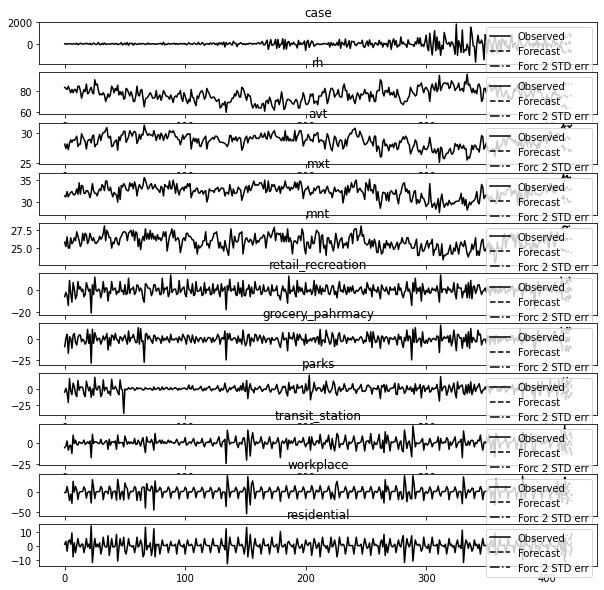

In [21]:
results.plot_forecast(10);

In [22]:
fc = results.forecast(train.values[-lag_order:],steps=10)
fc = pd.DataFrame(fc, columns=["case", "rh", "avt", "mxt", "mnt", "retail_recreation","grocery_pahrmacy","parks","transit_station","workplace","residential"])
fc

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
0,427.711144,74.046058,29.302634,33.088714,26.270246,6.369264,6.148493,-1.918058,7.936290,8.584623,-3.299743
1,115.166643,74.796037,29.263034,33.120592,26.100852,-2.640265,-2.913170,1.733445,-5.162598,-9.196324,1.640717
2,-101.246703,75.703742,29.576945,33.866670,26.386692,1.330030,-0.260886,7.394716,-4.781423,-7.614296,4.156116
3,-146.985000,76.985484,28.716433,32.265897,26.323885,-0.579535,2.686929,-7.761878,11.683786,19.341094,-7.896054
4,106.271735,74.019866,29.286889,33.180274,26.245796,-2.015749,-3.624251,-5.789052,-1.815733,1.742100,1.605449
5,-133.574807,73.873457,29.435530,33.485974,26.095384,1.982998,3.179845,8.265338,-5.152550,-13.192963,2.450217
6,-73.201154,75.353097,29.100255,32.629731,26.383046,-2.969152,-4.766643,-3.675522,-0.765345,2.310953,0.183677
7,223.682693,75.397452,28.866690,32.806044,26.114696,3.960239,2.899418,-1.046272,3.799385,3.427679,-1.335448
8,-23.507519,75.461196,29.038740,32.928454,26.180199,-0.279721,0.874078,1.398115,0.231605,-0.445766,-0.487963
9,6.362296,74.755572,29.245438,32.984756,26.286362,1.593523,0.029831,7.068495,-5.346443,-11.301286,4.401440


In [23]:
list_eval = test['case'].tolist()
list_hasil = fc['case'].tolist()

In [24]:
mse = mean_squared_error(list_eval, list_hasil)
mse

10937.672682482238

In [25]:
rmse = mean_squared_error(list_eval, list_hasil, squared=False)
rmse

104.58332889367328

In [26]:
mae = mean_absolute_error(list_eval, list_hasil)
mae

77.4026305745726